In [2]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')
sns.set()

import missingno as msno

from sklearn.preprocessing import StandardScaler
from scipy import stats

In [3]:
VG = pd.read_csv("/home/abhinav/vgsales.csv")
VG.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
#VG_df.isna().sum()
VG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
VG.dropna(axis=0, how="any", inplace=True)
VG.drop(columns="Rank", inplace=True)

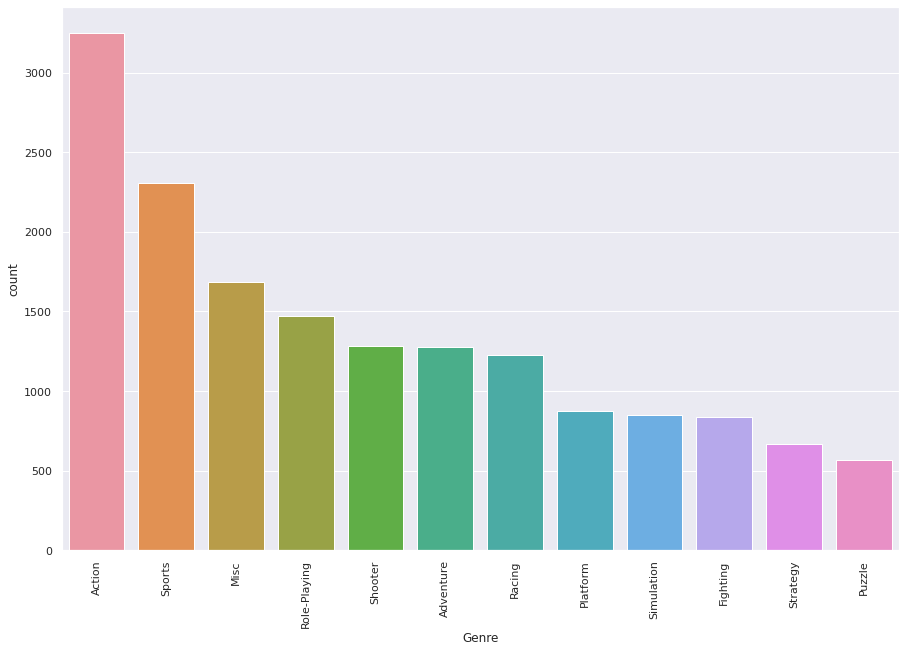

In [17]:
# Top Genres (Frequency)

plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=VG, order = VG['Genre'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

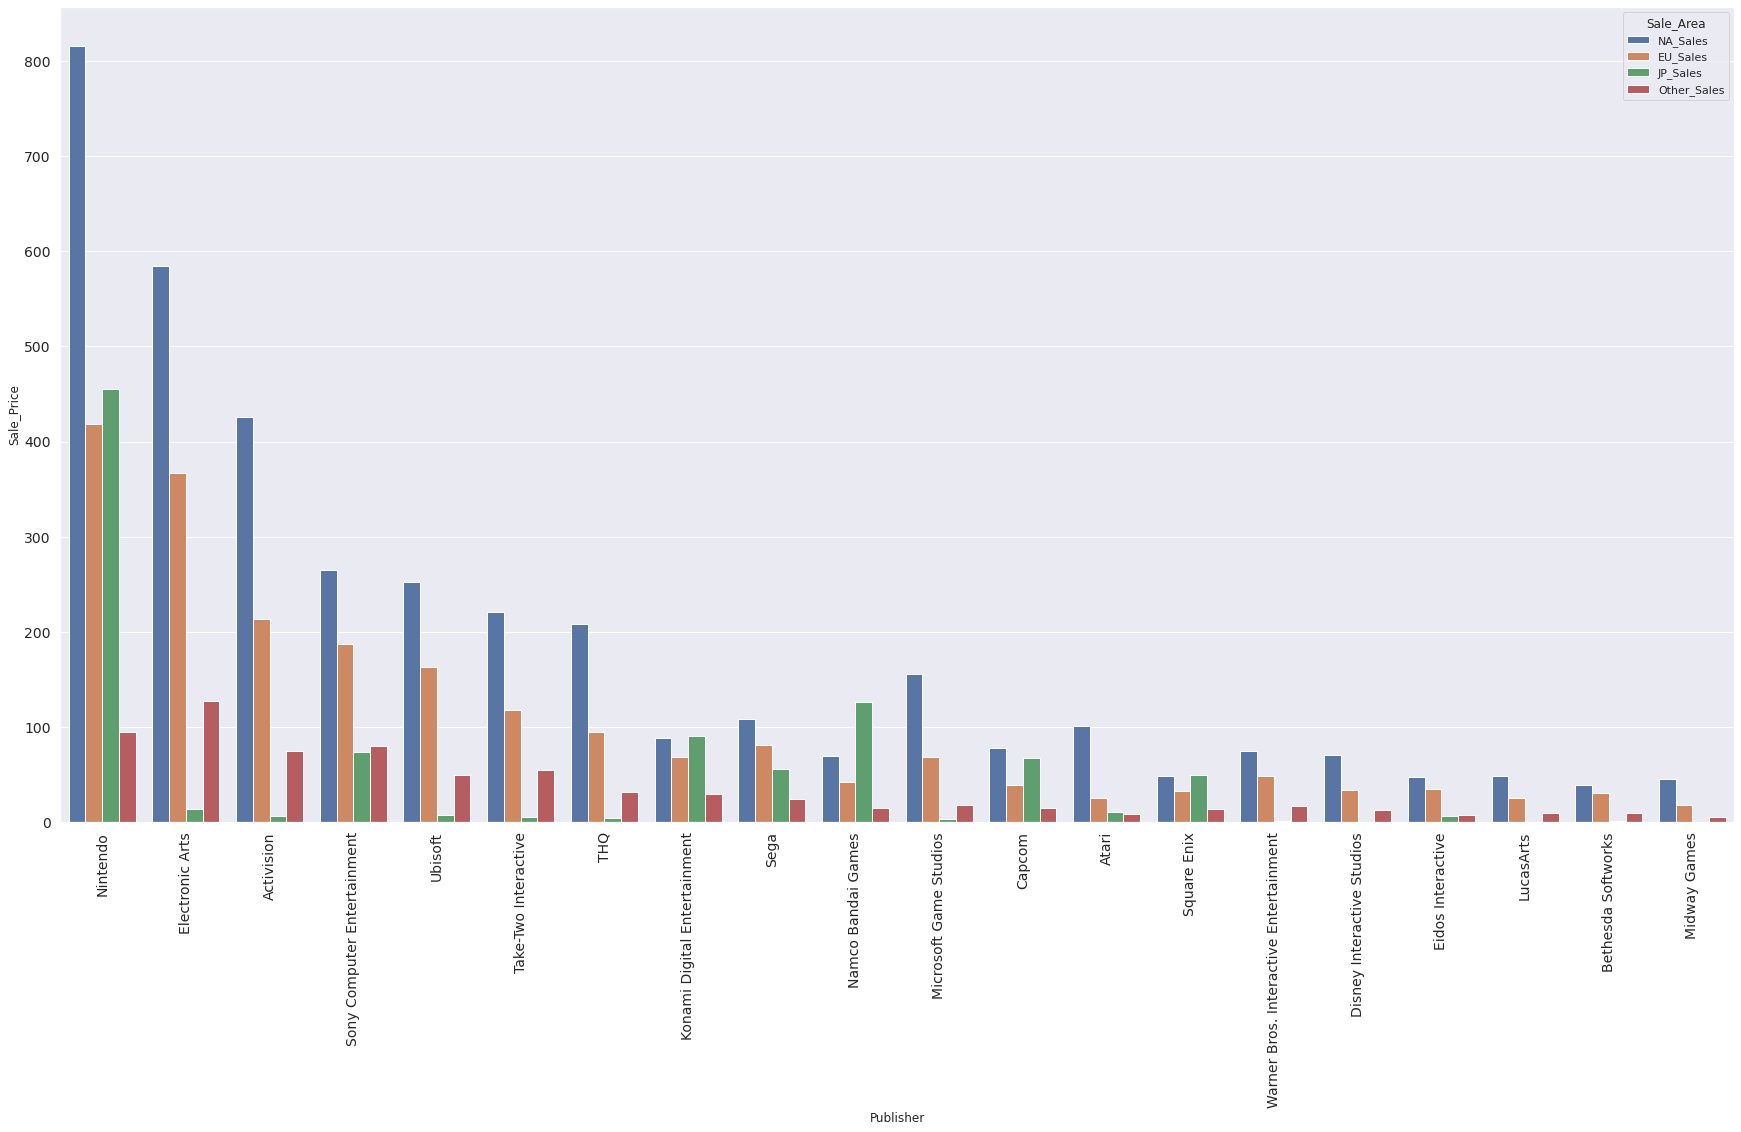

In [12]:
# Comparison of Publishers based on Sales

comp_publisher = VG[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
comp_publisher = comp_publisher.groupby(by=['Publisher']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
comp_publisher = comp_publisher.head(20)
comp_publisher = pd.melt(comp_publisher, id_vars=['Publisher'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
plt.figure(figsize=(30, 15))
sns.barplot(x='Publisher', y='Sale_Price', hue='Sale_Area', data=comp_publisher)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

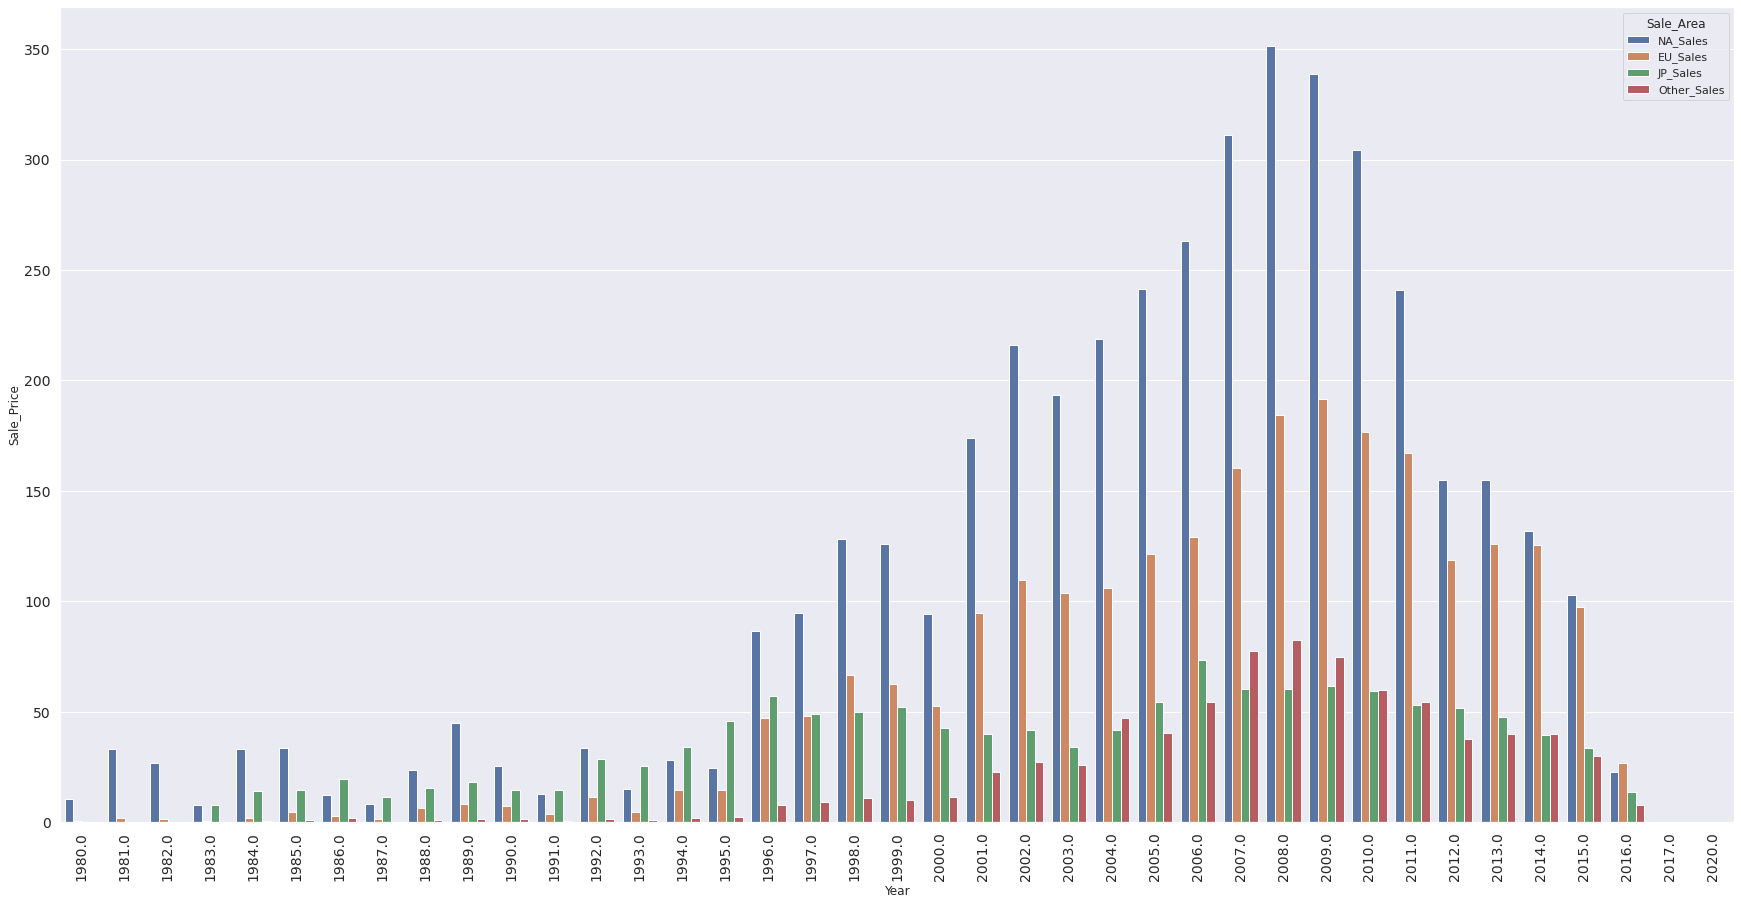

In [10]:
# Comparison of Years based on Sales

comp_year = VG[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
comp_year = comp_year.groupby(by=['Year']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
comp_year = comp_year
comp_year = pd.melt(comp_year, id_vars=['Year'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
plt.figure(figsize=(30, 15))
sns.barplot(x='Year', y='Sale_Price', hue='Sale_Area', data=comp_year)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

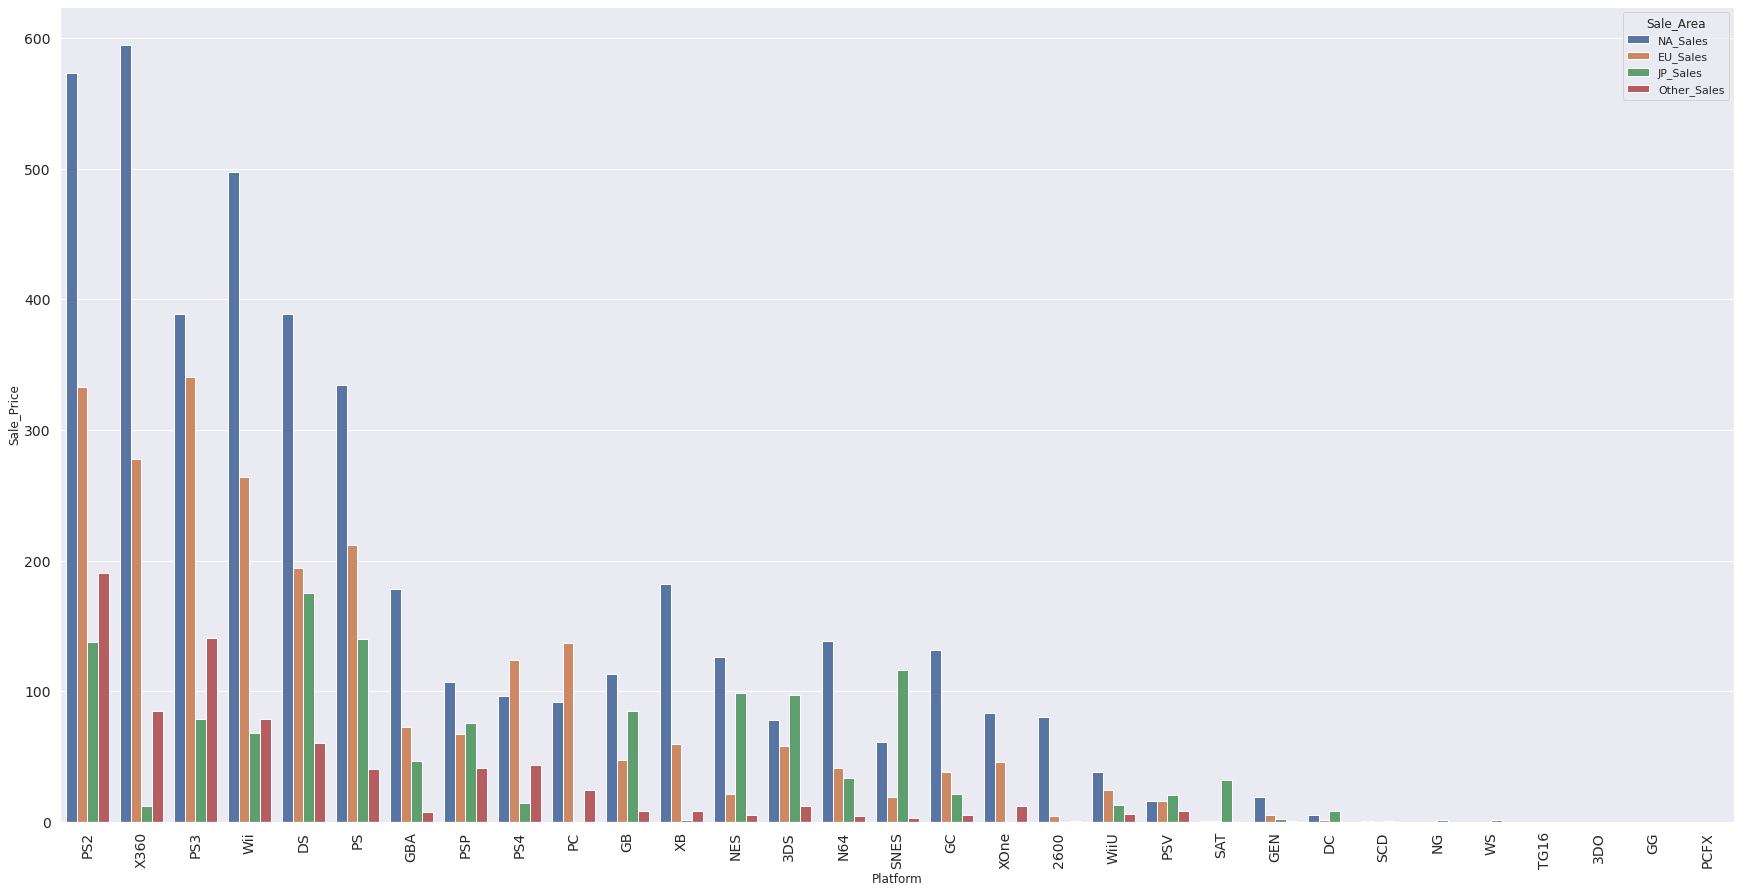

In [13]:
# Comparison of Platforms by Sales

comp_platform = VG[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
comp_platform = comp_platform
comp_platform = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
plt.figure(figsize=(30, 15))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_platform)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

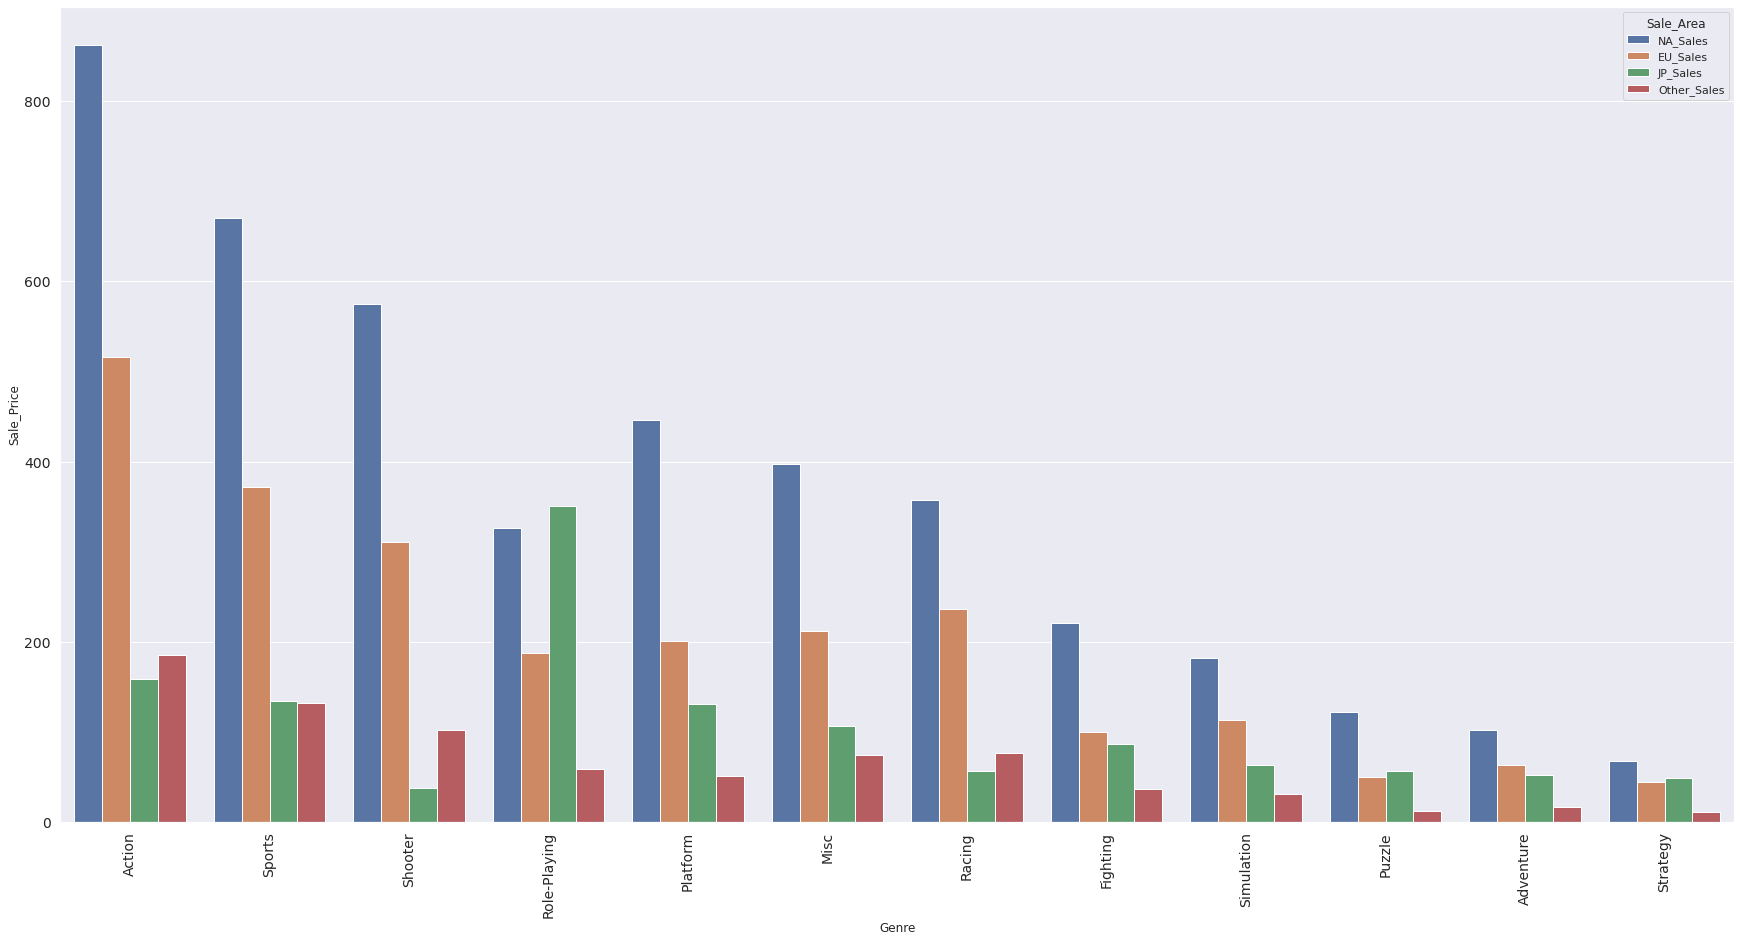

In [16]:
# Comparison of Genre by Sales

comp_genre = VG[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
comp_genre = comp_genre.groupby(by=['Genre']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
comp_genre = comp_genre
comp_genre = pd.melt(comp_genre, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
plt.figure(figsize=(30, 15))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_genre)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

<AxesSubplot:>

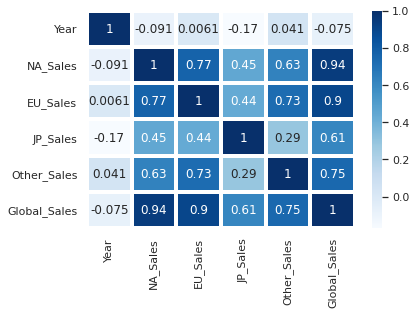

In [9]:
# Correlation Matrix
sns.heatmap(VG.corr(), cmap = "Blues", annot=True, linewidth=3)